Descripción del problema

Se eligió 3 imágenes, 2 gatos y un perro, de autoría personal, para implementar en esta solución. Bajo el esquema de grises se determino que el algoritmo que mejor podría tener un resultado positivo era la Ecualización del Histograma, el cual es una transformación que pretende obtener para una imagen un histograma con una distribución uniforme. Es decir, que exista el mismo número de píxeles para cada nivel de gris del histograma de una imagen monocroma para asi aumentar su contraste.


In [2]:
import cv2
import numpy as np
import PIL
from PIL import Image
from matplotlib import pyplot as plt
from skimage import io

In [3]:
y = np.zeros(256)
x = np.linspace(0,255,num=256,dtype = np.uint8)

def sacar_histograma(foto):
    ancho , alto , canales = foto.shape
    #recorre toda la imagen pixel por pixel
    for w in range(ancho):
        for h in range (alto):
            v = foto[w,h]
            #modificamos y[v] = y[v]+1;
            y[v] = y[v]+1
            
    plt.bar(x,y)
    plt.show()

In [4]:
def histograma_ecualizado(foto):
    ancho , alto = foto.shape
    #recorre toda la imagen pixel por pixel
    for w in range(ancho):
        for h in range (alto):
            v = foto[w,h]
            y[v] = y[v]+1
            
    plt.bar(x,y)
    plt.show()

In [5]:
def ecualizar(foto):
    
    #creamos un arreglo en cero con la forma de la foto
    foto_mejorada = np.zeros(foto.shape , foto.dtype)
    ancho , alto = foto.shape
    
    k =  255 / (ancho * alto)
    
    #el acumulador al momento de recorrer el histograma
    suma= 0
    
    for w in range(ancho):
        for h in range (alto):
            for s in range(foto[w,h]):
                suma = suma + y[s]
            foto_mejorada[w,h] = k*suma
            suma = 0

    return foto_mejorada

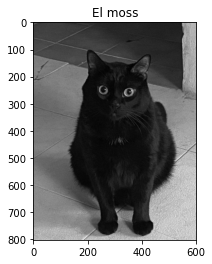

In [6]:
#mconvertirmos y salvamos a Moss en escala de grises
moss =Image.open("Moss.jpg").convert('L')
moss.save('gray_Moss.jpg')

#volvemos a cargar a Moss , pero ya en gris.

moss = cv2.imread('gray_Moss.jpg')
plt.title("El moss")
plt.imshow(moss)


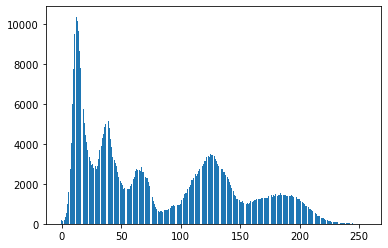

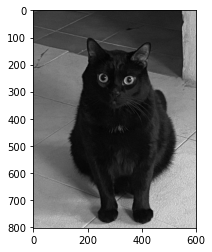

In [114]:
#Histograma de Moss
sacar_histograma(moss)

#mostramos a mi gato Moss
fmoss2 = plt.figure(2)
plmoss2=fmoss2.add_subplot(1,1,1)
plmoss2.imshow(moss)

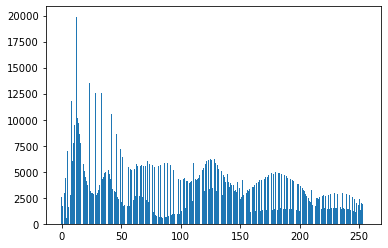

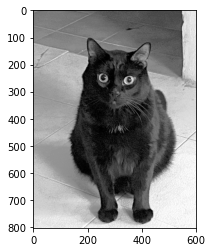

In [115]:
#ecualizacion de moss
l,a,b = cv2.split(moss)
moss_reloaded = ecualizar(l)

#hacemos el histograma de moss con la nueva foto
#Histograma de Moss
histograma_ecualizado(moss_reloaded)
plt.imshow(moss_reloaded , cmap = plt.cm.gray)


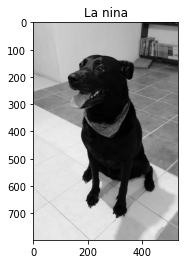

In [116]:
#mconvertirmos y salvamos a Nina en escala de grises
moss =Image.open("Nina.jpg").convert('L')
moss.save('gray_Nina.jpg')

#volvemos a cargar a Nina , pero ya en gris.

nina = cv2.imread('gray_Nina.jpg')
plt.title("La nina")
plt.imshow(nina)


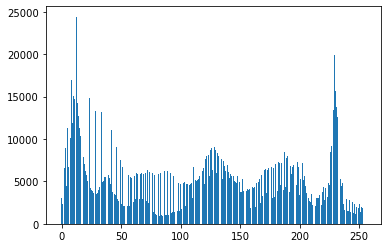

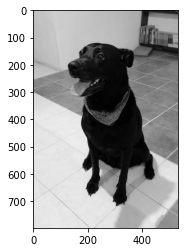

In [117]:
#Histograma de Nina
sacar_histograma(nina)

#mostramos a mi perra nina
fnina2 = plt.figure(2)
plnina2=fnina2.add_subplot(1,1,1)
plnina2.imshow(nina)

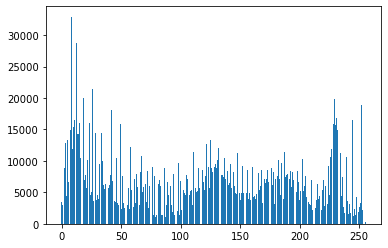

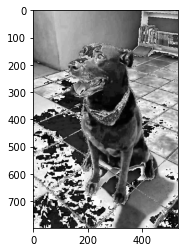

In [118]:
#ecualizacion de nina
l,a,b = cv2.split(nina)
nina_reloaded = ecualizar(l)

#hacemos el histograma de moss con la nueva foto
#Histograma de Moss
histograma_ecualizado(nina_reloaded)
plt.imshow(nina_reloaded , cmap = plt.cm.gray)

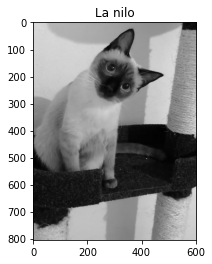

In [119]:
#mconvertirmos y salvamos a nilo en escala de grises
nilo =Image.open("Nilo.jpg").convert('L')
nilo.save('gray_Nilo.jpg')

#volvemos a cargar a Nilo , pero ya en gris.

nilo = cv2.imread('gray_Nilo.jpg')
plt.title("La nilo")
plt.imshow(nilo)


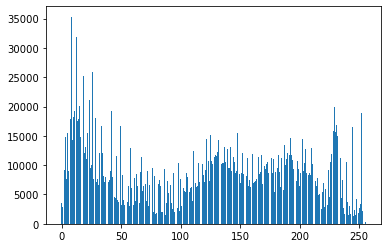

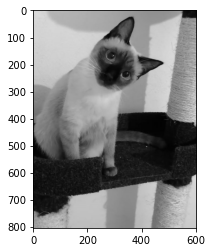

In [120]:
#Histograma de Nilo
sacar_histograma(nilo)

#mostramos a mi gatita nilo
fnilo2 = plt.figure(2)
plnilo2=fnilo2.add_subplot(1,1,1)
plnilo2.imshow(nilo)

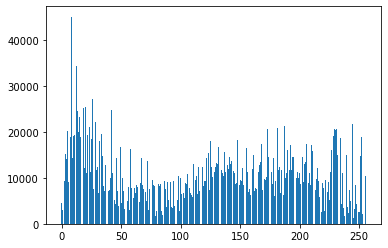

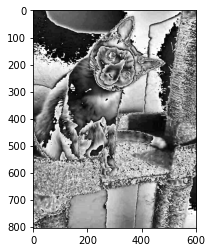

In [121]:
#ecualizacion de nilo
l,a,b = cv2.split(nilo)
nilo_reloaded = ecualizar(l)

#hacemos el histograma de Nilo con la nueva foto
#Histograma de Moss
histograma_ecualizado(nilo_reloaded)
plt.imshow(nilo_reloaded , cmap = plt.cm.gray)